In [1]:
import tensorflow as tf
import os
import PIL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers,datasets


In [2]:
tf.compat.v1.losses.sparse_softmax_cross_entropy

<function tensorflow.python.ops.losses.losses_impl.sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')>

In [3]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir=".",untar=True)

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
img_count=len(list(data_dir.glob("*/*.jpg")))
img_count

3670

In [6]:
roses=list(data_dir.glob("roses/*"))

In [7]:
len(roses)

641

In [8]:
import cv2

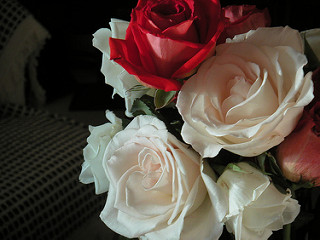

In [9]:
PIL.Image.open(str(roses[1]))

In [10]:
flower_dataset={
    "roses":list(data_dir.glob("roses/*")),
    "tulips":list(data_dir.glob("tulips/*")),
    "sunflowers":list(data_dir.glob("sunflowers/*")),
    "daisy":list(data_dir.glob("daisy/*")),
    "dandelion":list(data_dir.glob("dandelion/*"))
}

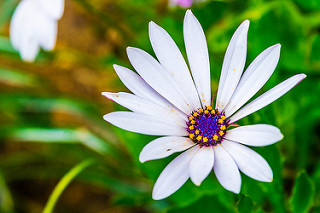

In [11]:
PIL.Image.open(str(flower_dataset["daisy"][20]))

In [12]:
img=cv2.imread(str(flower_dataset["dandelion"][10]))

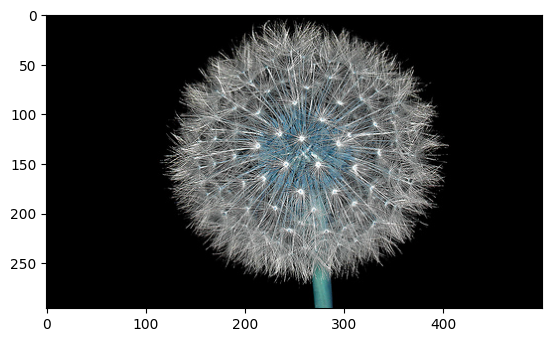

In [13]:
plt.imshow(img)

In [14]:
flower_names={"roses":0,"tulips":1,"sunflowers":2,"daisy":3,"dandelion":4}

In [15]:
x=[]
y=[]
for flower_name,images in flower_dataset.items():
    for img in images:
        img=cv2.imread(str(img))
        resized=cv2.resize(img,(180,180))
        x.append(resized)
        y.append(flower_names[flower_name])

In [16]:
x[:5]


[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
x=np.array(x)
y=np.array(y)

1

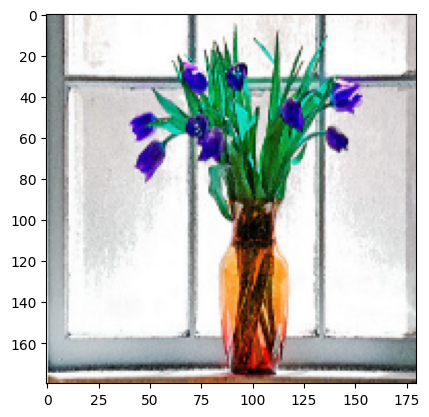

In [19]:
plt.imshow(x[1000])
y[1000]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [21]:
len(x_train)

2752

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr=LogisticRegression()

In [24]:
x_train_flattened=x_train.reshape(-1,180*180*3)
x_train_flattened=x_train_flattened/255

In [25]:
x_train_flattened.shape

(2752, 97200)

In [26]:
x_test_flattened=x_test.reshape(-1,180*180*3)
x_test_flattened=x_test_flattened/255

In [27]:
lr.fit(x_train_flattened,y_train)

C:\Users\Naveen\miniconda3\envs\houseenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr.score(x_test_flattened,y_test)

0.39651416122004357

In [29]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [30]:
model=keras.Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5)
])

In [31]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])


In [32]:
model.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20


86/86 [==============================] - 17s 170ms/step - loss: 1.4219 - accuracy: 0.4219
Epoch 2/20
86/86 [==============================] - 16s 191ms/step - loss: 1.0205 - accuracy: 0.5919
Epoch 3/20
86/86 [==============================] - 15s 178ms/step - loss: 0.8989 - accuracy: 0.6497
Epoch 4/20
86/86 [==============================] - 15s 178ms/step - loss: 0.7560 - accuracy: 0.7082
Epoch 5/20
86/86 [==============================] - 18s 205ms/step - loss: 0.5755 - accuracy: 0.7878
Epoch 6/20
86/86 [==============================] - 18s 209ms/step - loss: 0.4064 - accuracy: 0.8645
Epoch 7/20
86/86 [==============================] - 16s 185ms/step - loss: 0.2660 - accuracy: 0.9062
Epoch 8/20
86/86 [==============================] - 17s 194ms/step - loss: 0.1406 - accuracy: 0.9557
Epoch 9/20
86/86 [==============================] - 16s 186ms/step - loss: 0.1002 - accuracy: 0.9680
Epoch 10/20
86/86 [==============================] - 16s 187ms/step - loss: 0.0695 - accu

In [33]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 50ms/step - loss: 2.6038 - accuracy: 0.6623


[2.6038434505462646, 0.6623093485832214]

In [34]:
## This is called overfitting since it performs well on training but not on testing dataset

In [35]:
y_preds=model.predict(x_test_scaled)

29/29 [==============================] - 2s 45ms/step


In [36]:
y_preds_final=[np.argmax(i) for i in y_preds]

In [37]:
y_preds_final[:5]

[2, 0, 2, 3, 2]

In [38]:
y_test[:5]

array([1, 0, 2, 4, 2])

In [39]:
## Now let us use data augumentation to provide more samples by modifying the same sample like zooming in and out or increasing
## decreasing the contrast etc or rotating to any side or flipping

In [40]:
data_augumentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.7),
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomRotation(factor=(-.2,.2))
])

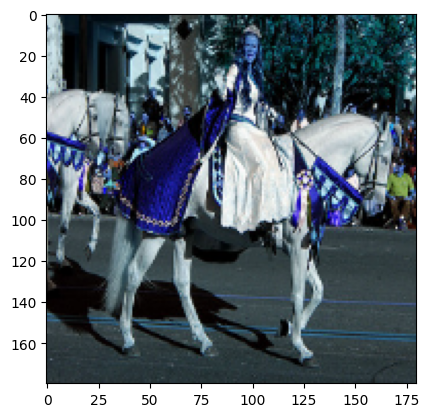

In [41]:
plt.imshow(x[11])

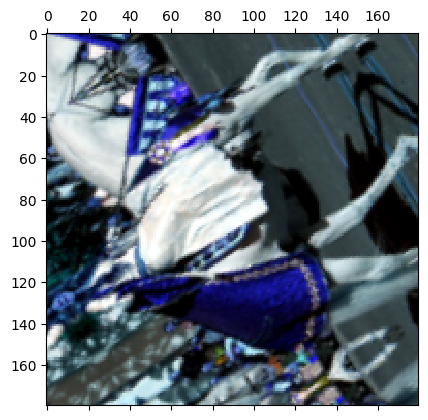

In [42]:
plt.matshow(data_augumentation(x)[11].numpy().astype("uint8"))

In [43]:
model=keras.Sequential([
    data_augumentation,
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5)
])

In [44]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
model.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
86/86 [==============================] - 26s 255ms/step - loss: 1.4991 - accuracy: 0.3485
Epoch 2/20
86/86 [==============================] - 22s 252ms/step - loss: 1.2403 - accuracy: 0.4604
Epoch 3/20
86/86 [==============================] - 21s 244ms/step - loss: 1.1794 - accuracy: 0.5124
Epoch 4/20
86/86 [==============================] - 21s 245ms/step - loss: 1.1317 - accuracy: 0.5447
Epoch 5/20
86/86 [==============================] - 21s 248ms/step - loss: 1.0751 - accuracy: 0.5603
Epoch 6/20
86/86 [==============================] - 20s 238ms/step - loss: 1.0698 - accuracy: 0.5759
Epoch 7/20
86/86 [==============================] - 21s 239ms/step - loss: 1.0273 - accuracy: 0.5970
Epoch 8/20
86/86 [==============================] - 20s 235ms/step - loss: 1.0006 - accuracy: 0.6094
Epoch 9/20
86/86 [==============================] - 21s 240ms/step - loss: 1.0206 - accuracy: 0.5948
Epoch 10/20
86/86 [==============================] - 20s 235ms/step - loss: 0.9751 - accura

In [45]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 39ms/step - loss: 0.7922 - accuracy: 0.7048


[0.7922082543373108, 0.7047930359840393]

## Deep Learning:

#### Definition: 
    Deep learning is a subset of machine learning that involves neural networks with multiple layers (deep neural networks). These networks are capable of learning hierarchical representations of data by automatically extracting features at different levels of abstraction.
#### Training:
    In deep learning, models are typically trained on large amounts of labeled data to learn complex patterns and representations directly from the input data. The training process involves adjusting the weights of the neural network to minimize the difference between the predicted output and the actual output.
## Transfer Learning:

#### Definition: 
    Transfer learning is a machine learning technique where a model trained on one task is reused or adapted for a second related task. Instead of training a model from scratch, transfer learning leverages the knowledge gained from a source task to improve performance on a target task.
#### Process: 
    In transfer learning, a pre-trained model, often trained on a large dataset for a specific task, is fine-tuned on a smaller dataset for a related task. This allows the model to transfer knowledge and features learned from the source task to the target task, even if the target task has a different dataset or slightly different requirements.